<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/Linear_Rregression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.shape

(1338, 7)

# Basic Analysis

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
788,29,male,22.515,3,no,northeast,5209.57885
1004,47,male,19.190,1,no,northeast,8627.54110
872,42,male,24.860,0,no,southeast,5966.88740
823,44,female,29.810,2,no,southeast,8219.20390
1247,33,male,29.400,4,no,southwest,6059.17300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.var()

<ipython-input-9-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
df.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


# EDA

In [ ]:
numericFeatures = list()
categoricalFeatures = list()
target = None

for feature in df.columns:
  if (df[feature].dtype == 'int64' or df[feature].dtype == 'float64') and feature != 'charges':
    numericFeatures.append(feature)
  elif  df[feature].dtype == 'object':
    categoricalFeatures.append(feature)
  else:
    target = feature
print(f'target : {feature}\nNumeric : {numericFeatures}\ncategorical : {categoricalFeatures}')

target : charges
Numeric : ['age', 'bmi', 'children']
categorical : ['sex', 'smoker', 'region']


## Univarient numerica features

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

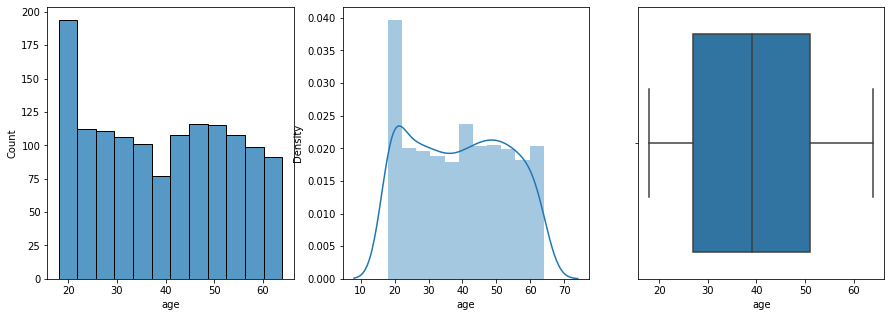

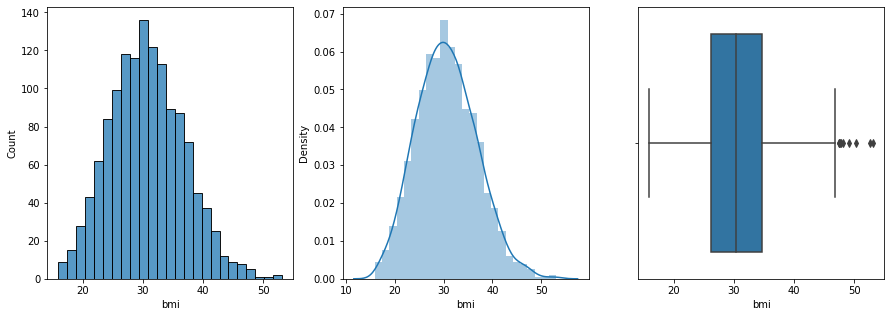

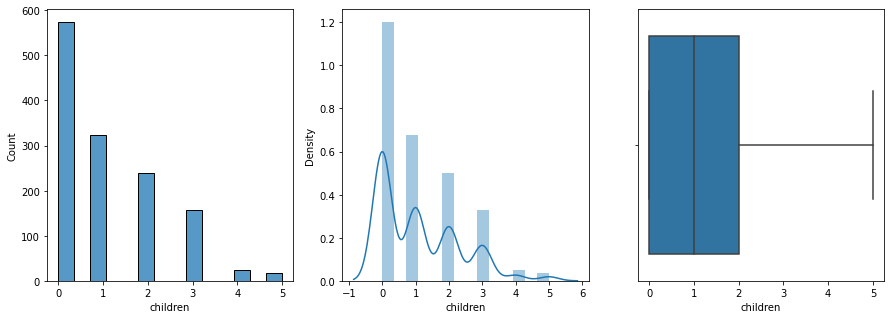

In [ ]:
for feature in numericFeatures:
  fig, ax = plt.subplots(1,3,figsize=(15, 5))
  sns.histplot(df[feature], ax=ax[0])
  sns.distplot(df[feature], ax=ax[1])
  sns.boxplot(df[feature],ax=ax[2])
  fig.show()


## Univarient Categorical Features

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


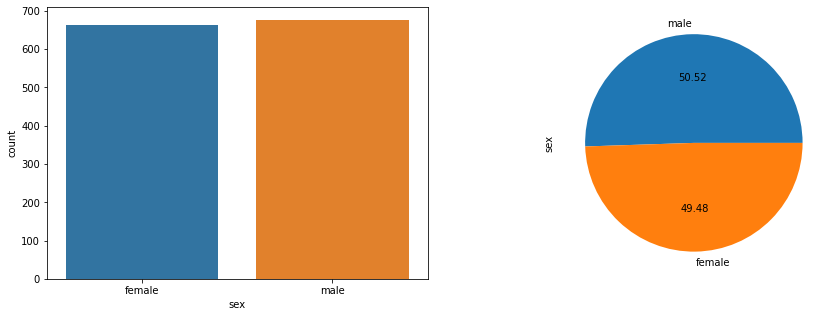

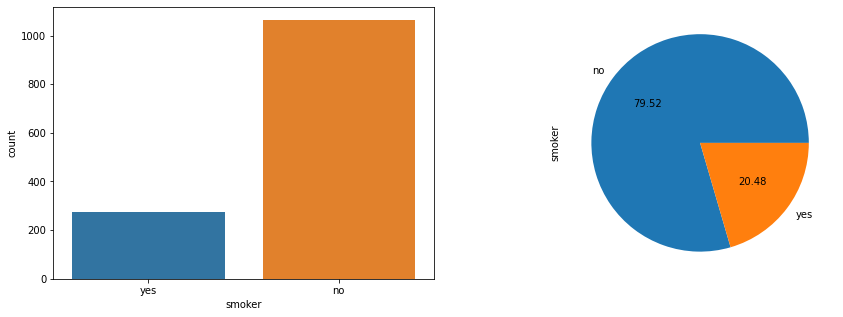

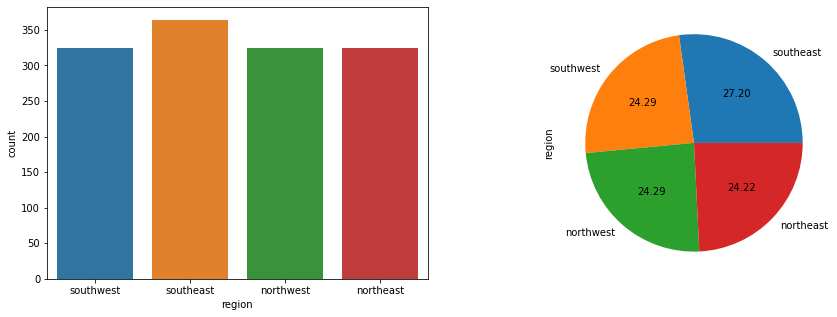

In [ ]:
for feature in categoricalFeatures:
  fig, ax = plt.subplots(1,2,figsize=(15, 5))
  sns.countplot(df[feature], ax=ax[0])
  df[feature].value_counts().plot(kind='pie',autopct='%.2f')
  fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


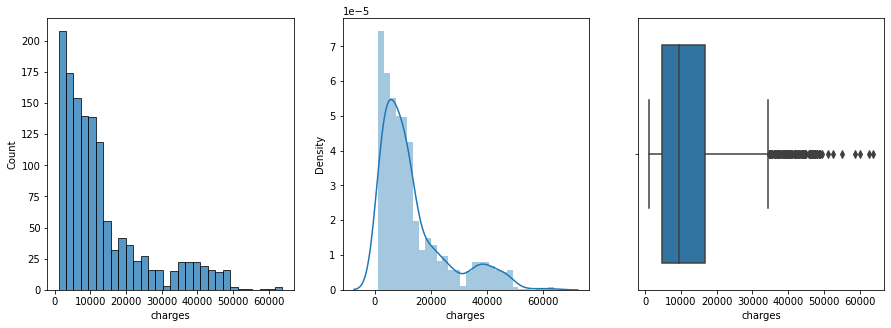

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.histplot(df[target], ax=ax[0])
sns.distplot(df[target], ax=ax[1])
sns.boxplot(df[target],ax=ax[2])
fig.show()

### Observation of univarient analysis
  - feature tarnsformation
  - outliers
  


## Bivarient analysis

In [ ]:
for feature in df.columns:
  print(f'{feature} : {df[feature].dtype}')

age : int64
sex : object
bmi : float64
children : int64
smoker : object
region : object
charges : float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


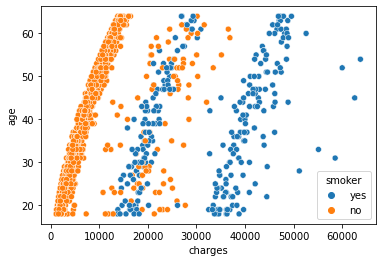

In [ ]:
sns.scatterplot(df['charges'],df['age'],hue=df['smoker'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


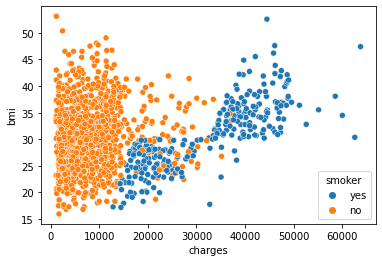

In [ ]:
sns.scatterplot(df['charges'],df['bmi'],hue=df['smoker'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


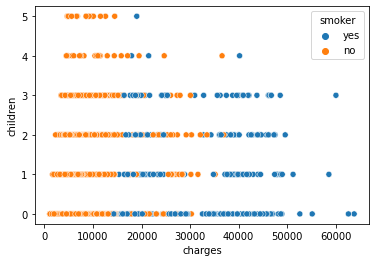

In [ ]:
sns.scatterplot(df['charges'],df['children'],hue=df['smoker'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


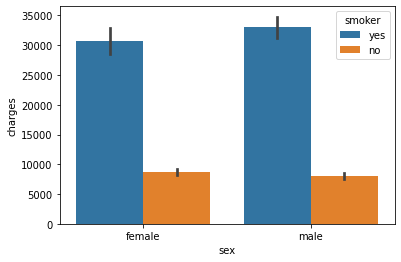

In [ ]:
sns.barplot(df['sex'],df['charges'],hue=df['smoker'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


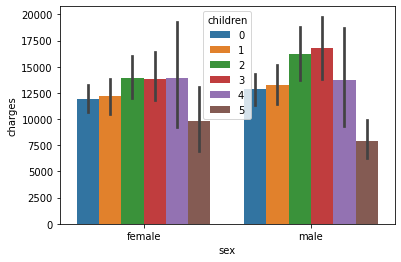

In [ ]:
sns.barplot(df['sex'],df['charges'],hue=df['children'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


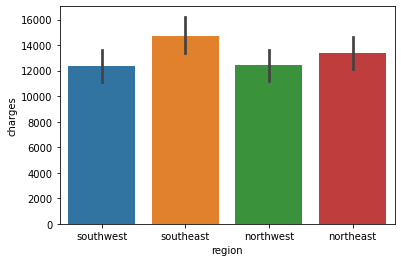

In [ ]:
sns.barplot(df['region'],df['charges'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


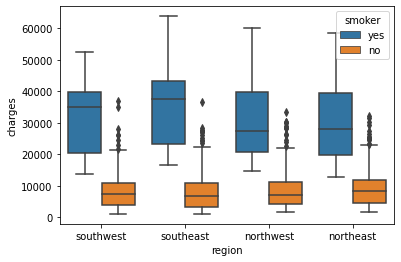

In [ ]:
sns.boxplot(df['region'],df['charges'],hue=df['smoker'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


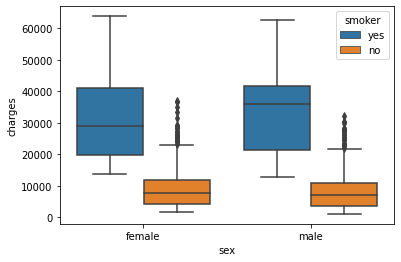

In [ ]:
sns.boxplot(df['sex'],df['charges'],hue=df['smoker'])

# Preprocessing

In [ ]:
#No missing data

In [ ]:
# Onehot Encoding 
for feature in categoricalFeatures:
  print(df[feature].value_counts(),end='\n\n')

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [ ]:
df = pd.get_dummies(df, columns = categoricalFeatures,drop_first=True)

Logarithmic transformation


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

Reciprocal transformation


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Square root transformation
boxcox transformation


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

yojohnson transformation


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

Logarithmic transformation
Reciprocal transformation


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

Square root transformation
boxcox transformation


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


yojohnson transformation


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


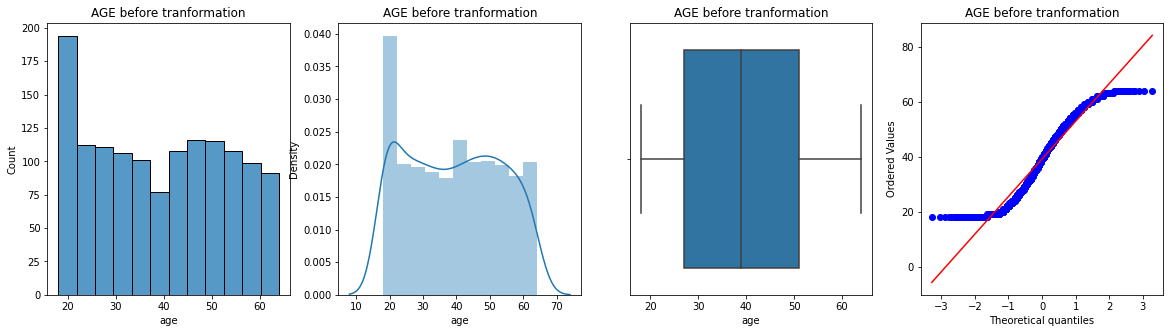

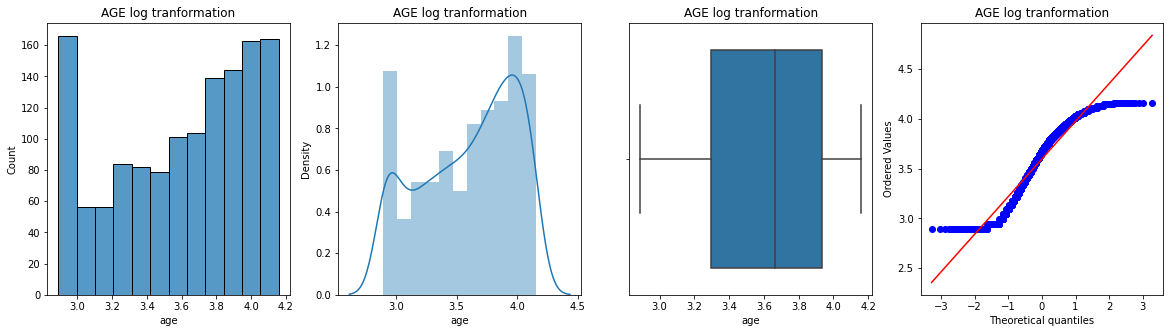

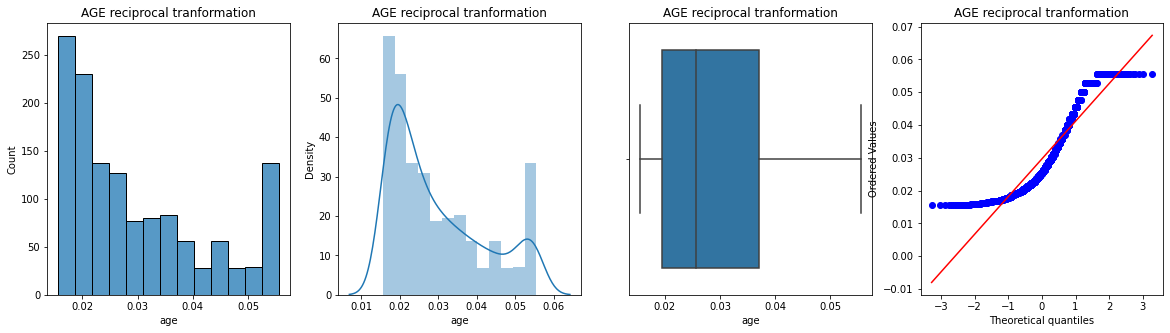

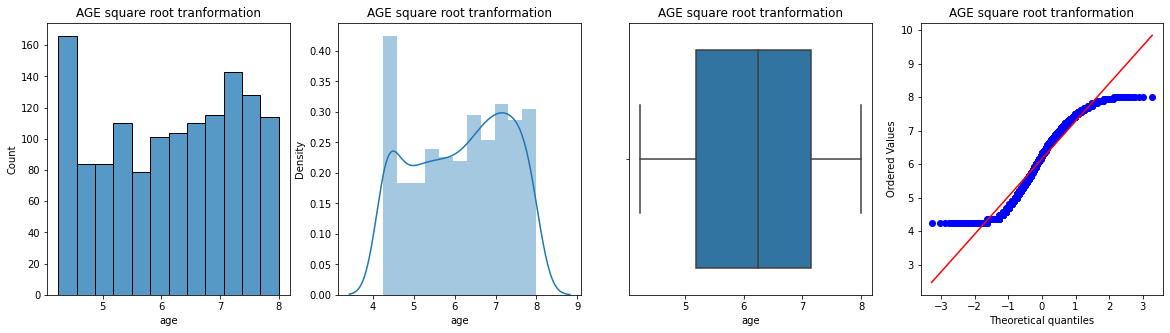

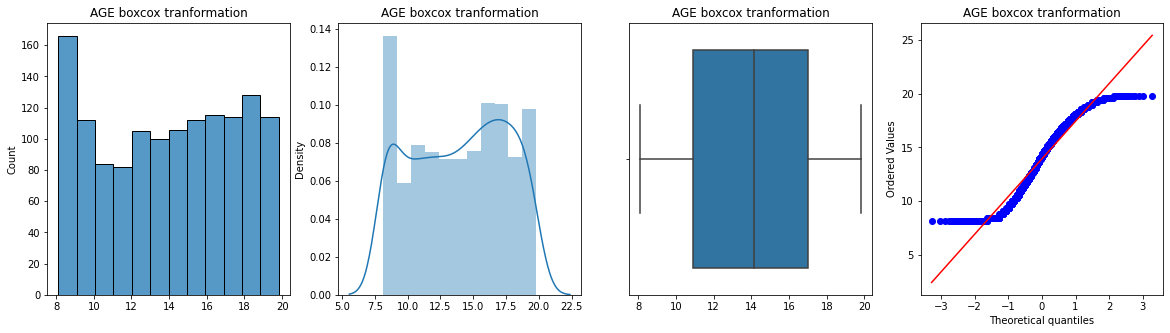

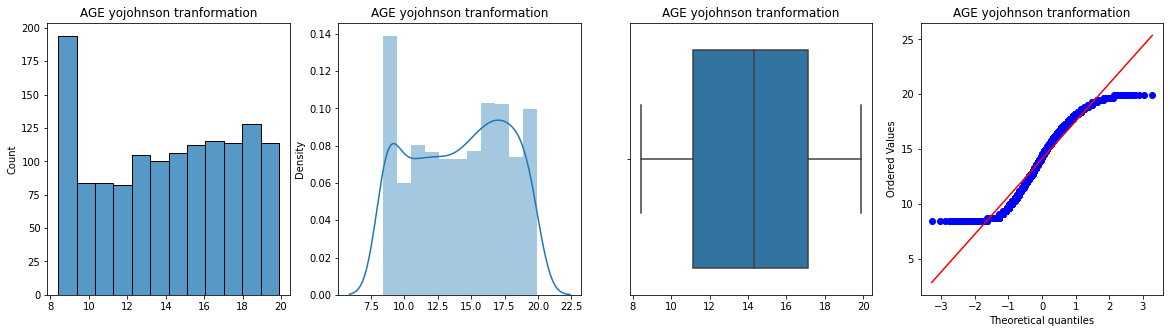

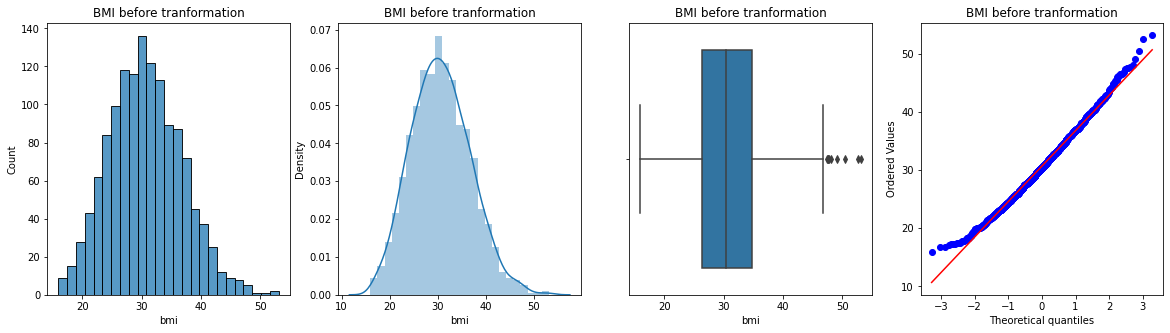

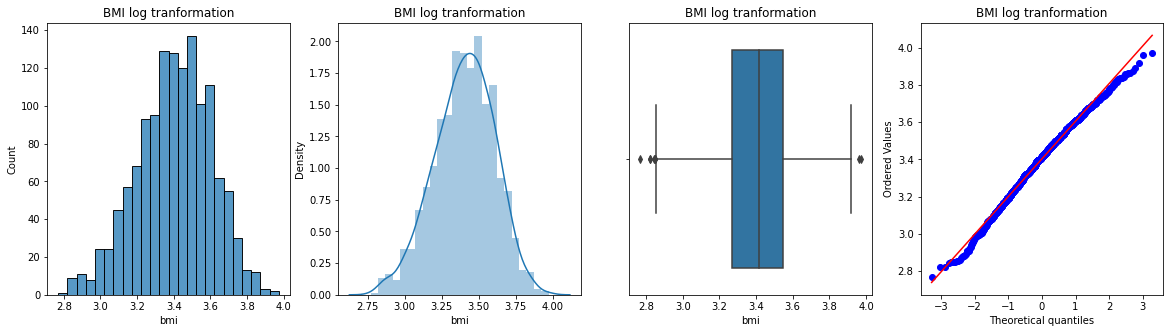

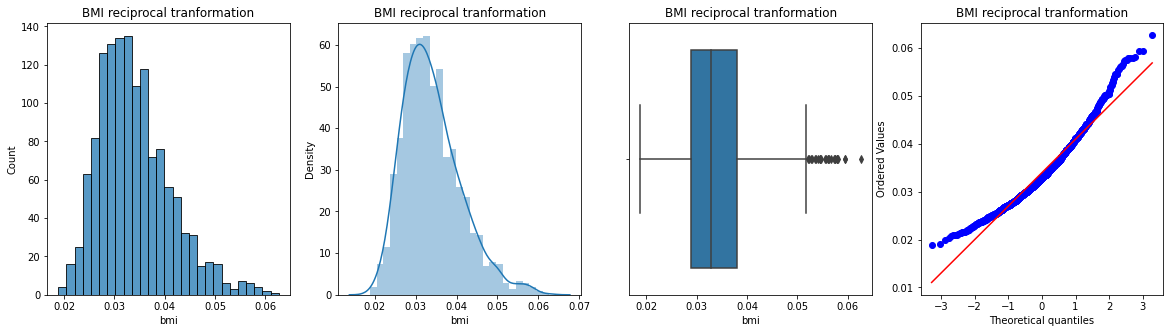

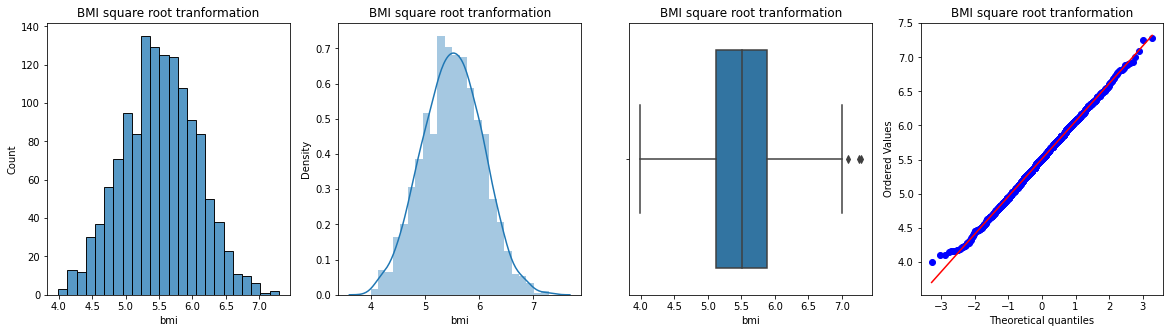

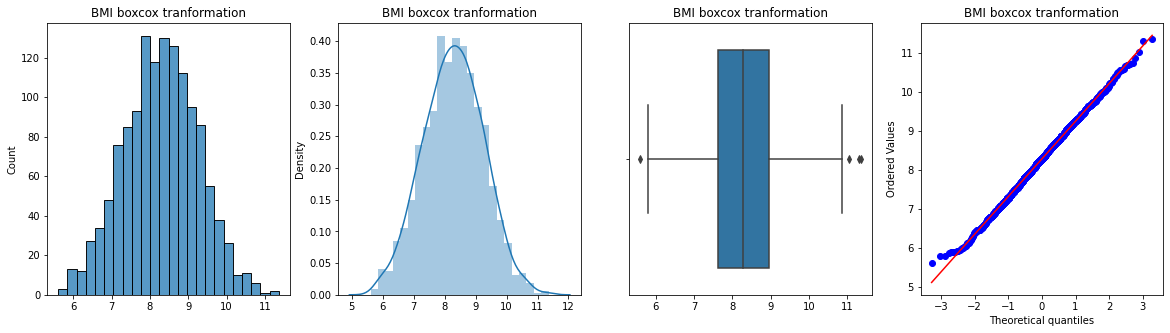

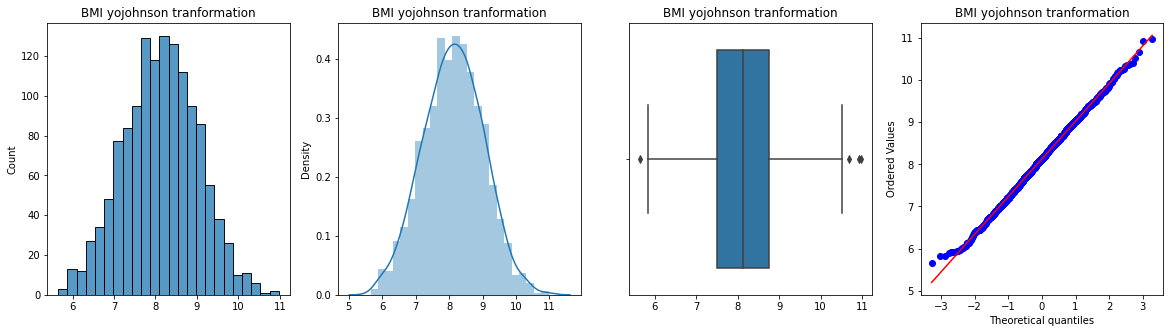

In [ ]:
for feature in ['age','bmi']:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(df[feature], ax=ax[0]).set(title=f'{feature.upper()} before tranformation')
  sns.distplot(df[feature], ax=ax[1]).set(title=f'{feature.upper()} before tranformation')
  sns.boxplot(df[feature],ax=ax[2]).set(title=f'{feature.upper()} before tranformation')
  stats.probplot(df[feature], dist="norm", plot=plt)
  plt.title(f'{feature.upper()} before tranformation')
  fig.show()


  print('Logarithmic transformation')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(np.log(df[feature]), ax=ax[0]).set(title=f'{feature.upper()} log tranformation')
  sns.distplot(np.log(df[feature]), ax=ax[1]).set(title=f'{feature.upper()} log tranformation')
  sns.boxplot(np.log(df[feature]),ax=ax[2]).set(title=f'{feature.upper()} log tranformation')
  stats.probplot(np.log(df[feature]), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} log tranformation')
  fig.show()


  print('Reciprocal transformation')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(1/(df[feature]), ax=ax[0]).set(title=f'{feature.upper()} reciprocal tranformation')
  sns.distplot(1/(df[feature]), ax=ax[1]).set(title=f'{feature.upper()} reciprocal tranformation')
  sns.boxplot(1/(df[feature]),ax=ax[2]).set(title=f'{feature.upper()} reciprocal tranformation')
  stats.probplot(1/(df[feature]), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} reciprocal tranformation')
  fig.show()


  print('Square root transformation')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot((df[feature])**(1/2), ax=ax[0]).set(title=f'{feature.upper()} square root tranformation')
  sns.distplot((df[feature])**(1/2), ax=ax[1]).set(title=f'{feature.upper()} square root tranformation')
  sns.boxplot((df[feature])**(1/2),ax=ax[2]).set(title=f'{feature.upper()} square root tranformation')
  stats.probplot((df[feature])**(1/2), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} square root tranformation')
  fig.show()

  data, param = stats.boxcox(df[feature]) 
  print('boxcox transformation')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(data, ax=ax[0]).set(title=f'{feature.upper()} boxcox tranformation')
  sns.distplot(data, ax=ax[1]).set(title=f'{feature.upper()} boxcox tranformation')
  sns.boxplot(data,ax=ax[2]).set(title=f'{feature.upper()} boxcox tranformation')
  stats.probplot(data, dist="norm", plot=plt)
  plt.title(f'{feature.upper()} boxcox tranformation')
  fig.show()

  data, param = stats.yeojohnson(df[feature]) 
  print('yojohnson transformation')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(data, ax=ax[0]).set(title=f'{feature.upper()} yojohnson tranformation')
  sns.distplot(data, ax=ax[1]).set(title=f'{feature.upper()} yojohnson tranformation')
  sns.boxplot(data,ax=ax[2]).set(title=f'{feature.upper()} yojohnson tranformation')
  stats.probplot(data, dist="norm", plot=plt)
  plt.title(f'{feature.upper()} yojohnson tranformation')
  fig.show()


In [ ]:
df['age'] = stats.yeojohnson(df['age'])[0]

In [ ]:
df['bmi'] = stats.yeojohnson(df['bmi'])[0]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


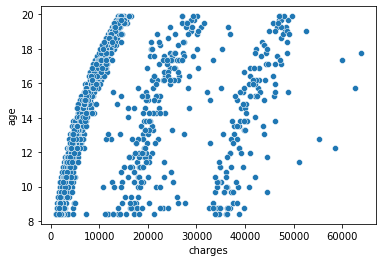

In [ ]:
sns.scatterplot(df['charges'],df['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


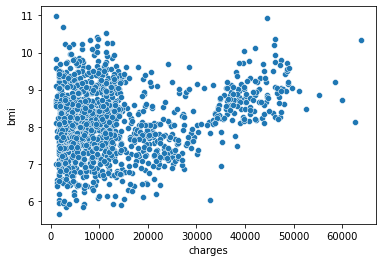

In [ ]:
sns.scatterplot(df['charges'],df['bmi'])

In [ ]:
# Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

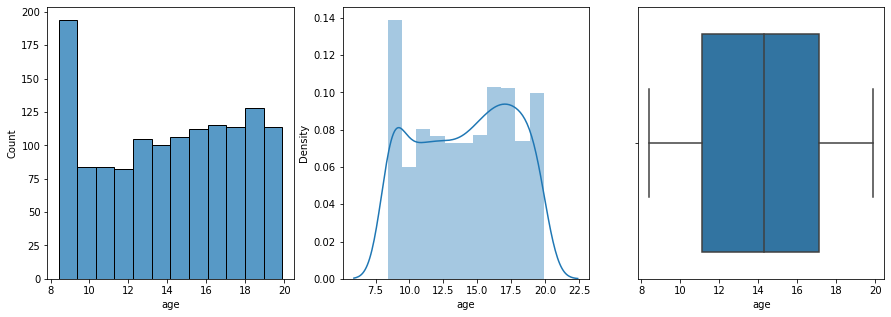

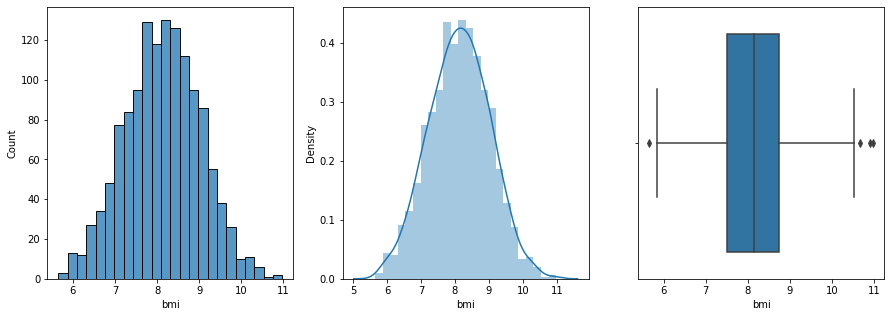

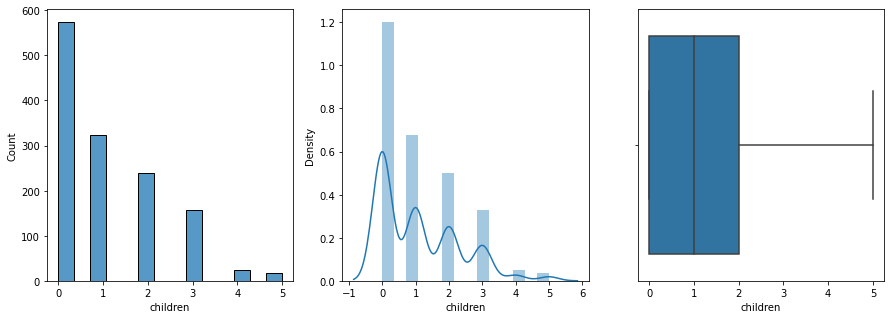

In [ ]:
for feature in numericFeatures:
  fig, ax = plt.subplots(1,3,figsize=(15, 5))
  sns.histplot(df[feature], ax=ax[0])
  sns.distplot(df[feature], ax=ax[1])
  sns.boxplot(df[feature],ax=ax[2])
  fig.show()

In [ ]:
print("Highest allowed",df['bmi'].mean() + 3*df['bmi'].std())
print("Lowest allowed",df['bmi'].mean() - 3*df['bmi'].std())

Highest allowed 10.80725563535563
Lowest allowed 5.4509366559026695


In [ ]:
# trimming outliers
upper_limit = df['bmi'].mean() + 3*df['bmi'].std()
lower_limit = df['bmi'].mean() - 3*df['bmi'].std()

# Finding the outliers
df = df[(df['bmi'] < upper_limit) | (df['bmi'] > lower_limit)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

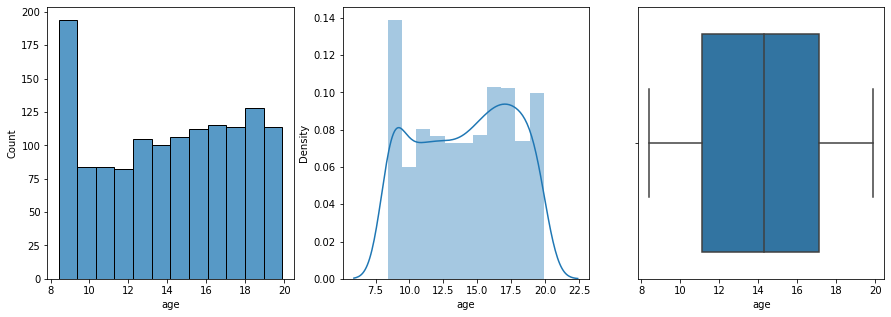

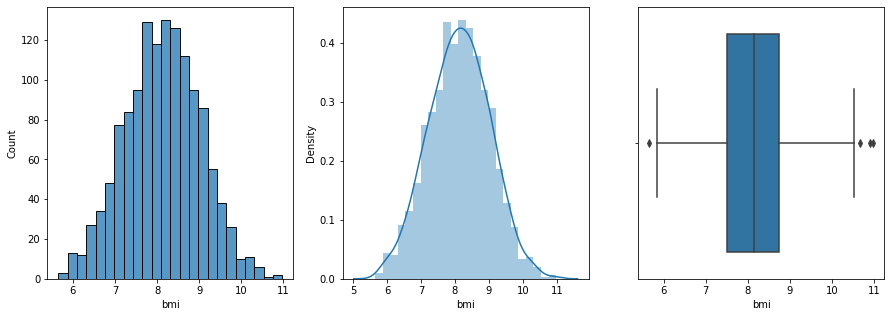

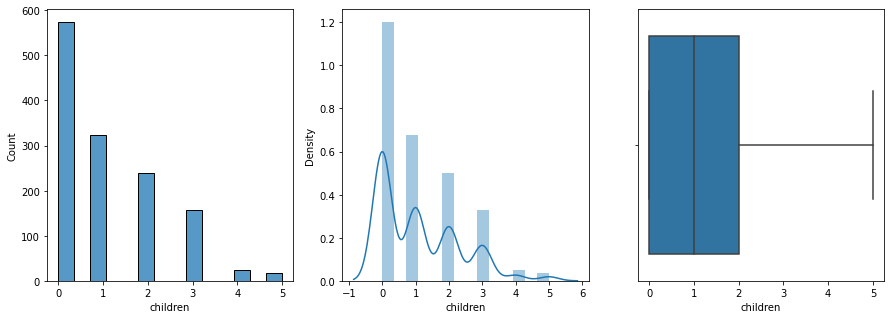

In [ ]:
for feature in numericFeatures:
  fig, ax = plt.subplots(1,3,figsize=(15, 5))
  sns.histplot(df[feature], ax=ax[0])
  sns.distplot(df[feature], ax=ax[1])
  sns.boxplot(df[feature],ax=ax[2])
  fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.33, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((896, 8), (442, 8), (896,), (442,))

In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sc = StandardScaler()

In [ ]:
sc = sc.fit(X_train)

In [ ]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Model traning and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(X_train,y_train)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
mean_absolute_error(y_test,pred)

4273.133870505094

In [ ]:
np.sqrt(mean_squared_error(y_test,pred))

5951.546209545255

In [ ]:
r2_score(y_test,pred)

0.7582927738716746

In [ ]:
# Adjusted r2 score
# 1 - ( ((1 - (r2_score(y_test,pred))**2) * (y_test.shape[0]-1))/(y_test.shape[0]-1)-(len(df.columns)-1)-1 )

# Checking Assumtions of linear regression

## Linear relation between independent and target feature

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


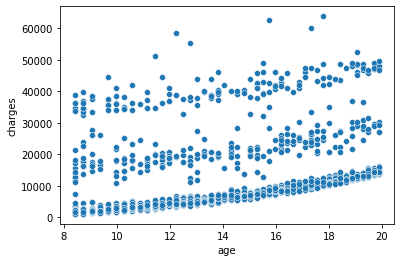

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


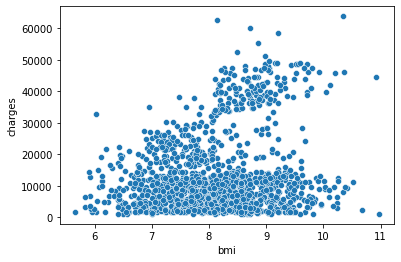

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


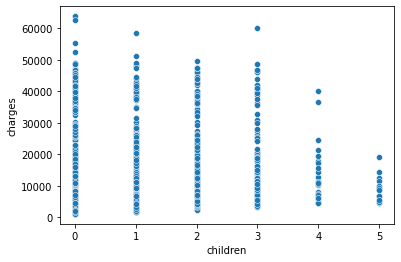

In [ ]:
for feature in ['age','bmi','children']:
  sns.scatterplot(df[feature], df['charges'])
  plt.show()

## There shouldn't be multicolinearity

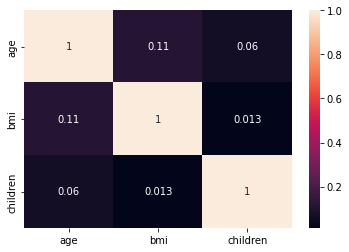

In [ ]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

## Normal Residuel distibution

In [ ]:
X_pred = lr.predict(X_train)

In [ ]:
y_train.shape,X_pred.shape

((896,), (896,))

In [ ]:
residual = y_train - X_pred

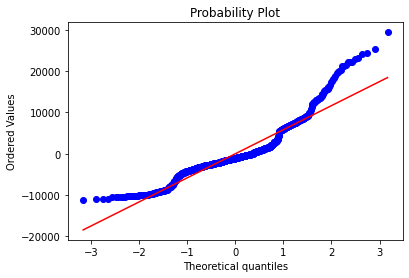

In [ ]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

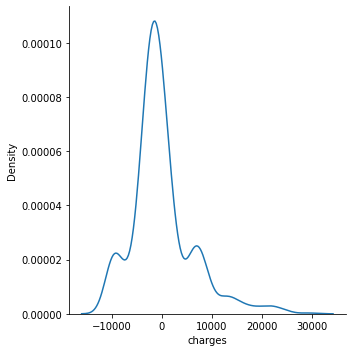

In [ ]:

sns.displot(residual,kind='kde')

## Homoscedasticity

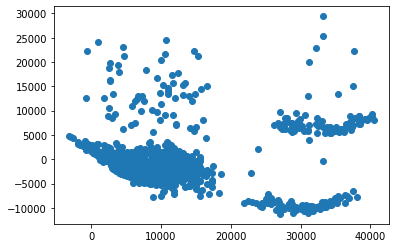

In [ ]:
plt.scatter(X_pred,residual)

## Autocorrelation of Residuals

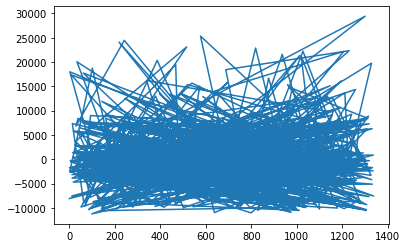

In [ ]:

plt.plot(residual)

## SGDRegressor

In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [101]:
sgd = SGDRegressor(penalty='elasticnet')

In [102]:
sgd = sgd.fit(X_train, y_train)

In [103]:
pred = sgd.predict(X_test)

In [104]:
mean_absolute_error(y_test,pred)

4286.459072096541

In [105]:
np.sqrt(mean_squared_error(y_test,pred))

5954.319607470938

In [106]:
r2_score(y_test,pred)

0.7580674520859367